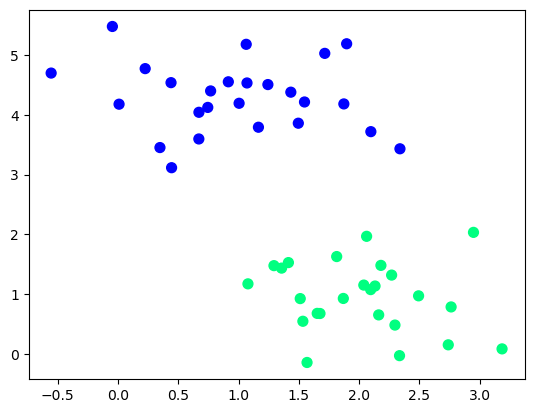

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#랜덤 데이터셋, n_samples 샘플개수, centers 중심좌표, cluster_std 클러스터의 표준편차
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

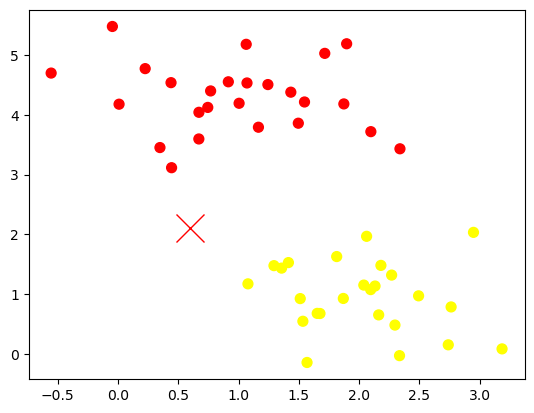

In [2]:
import numpy as np
xfit = np.linspace(-1, 3.5, 10) # -1 ~ 3.5 10등분
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# X 데이터는 어느 클래스로 분류될까요?
plt.plot([0.6], [2.1], 'x', color='red', markersize=20)

(-1.0, 3.5)

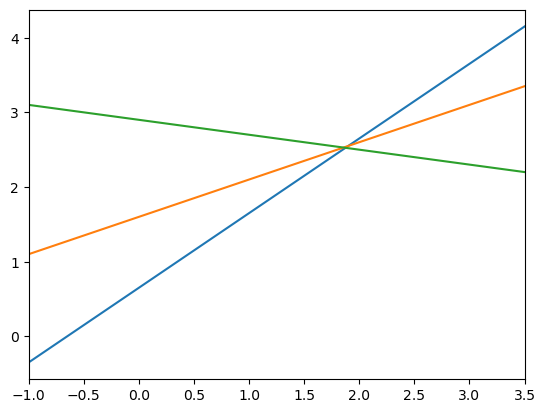

In [4]:
#기울기와 절편에 따라 구분선이 달라짐
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b)
plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC
#선형분류 linear, 비선형분류 rbf(기본값)
model = SVC(kernel='linear')
#model = SVC()
model.fit(X, y)

SVC(kernel='linear')

In [6]:
#서포트 벡터의 좌표값
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

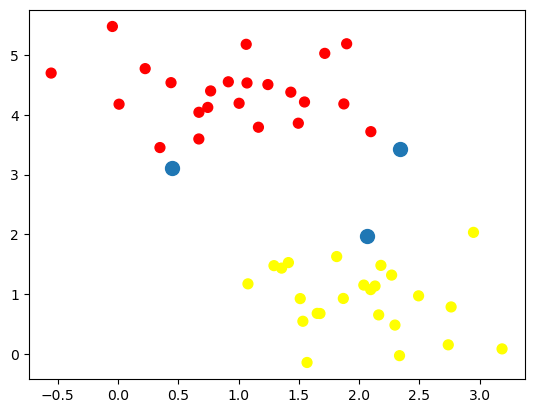

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)

In [9]:
a,b = np.meshgrid([10,20],[30,40])
#print(a)
#print(a.ravel()) # 행렬을 1차원 배열로 만드는 함수
#print(a.ravel().T) # 행렬전치, Transposition Arrays and Swapping Axes
c = np.vstack([a.ravel(), b.ravel()]).T
#c = np.vstack([a.ravel(), b.ravel()])
print(c)

[[10 30]
 [20 30]
 [10 40]
 [20 40]]


In [10]:
#reshape 연습
a=np.array([[10,20,30],[40,50,60]])
print(a.shape)
b=a.reshape(3,2)
print(a)
print(b)
print(b.shape)

(2, 3)
[[10 20 30]
 [40 50 60]]
[[10 20]
 [30 40]
 [50 60]]
(3, 2)


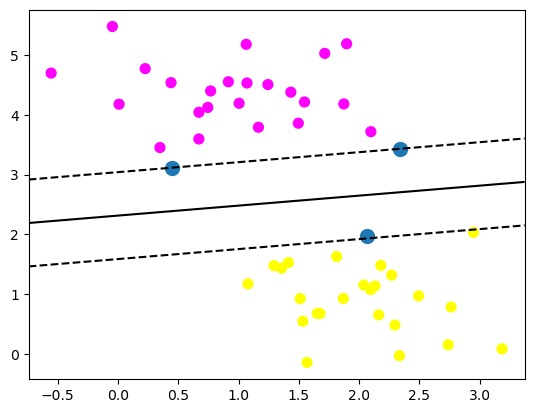

In [11]:
def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치
    #판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

    # 서포트 벡터 그리기
    ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1], s=100)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#서포트 벡터 표시
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc(model)

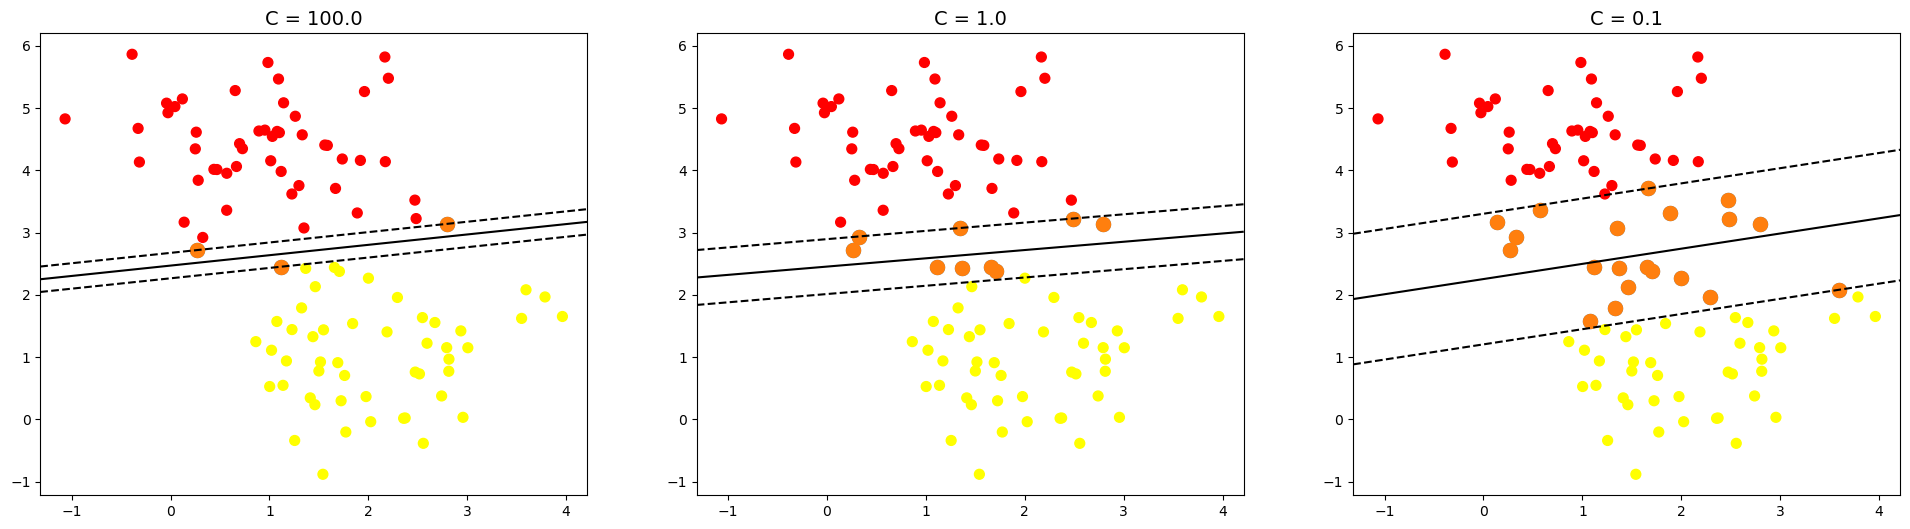

In [12]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, cost in zip(ax, [100, 1, 0.1]):
    model = SVC(kernel='linear', C=cost).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('C = {0:.1f}'.format(cost), size=14)

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

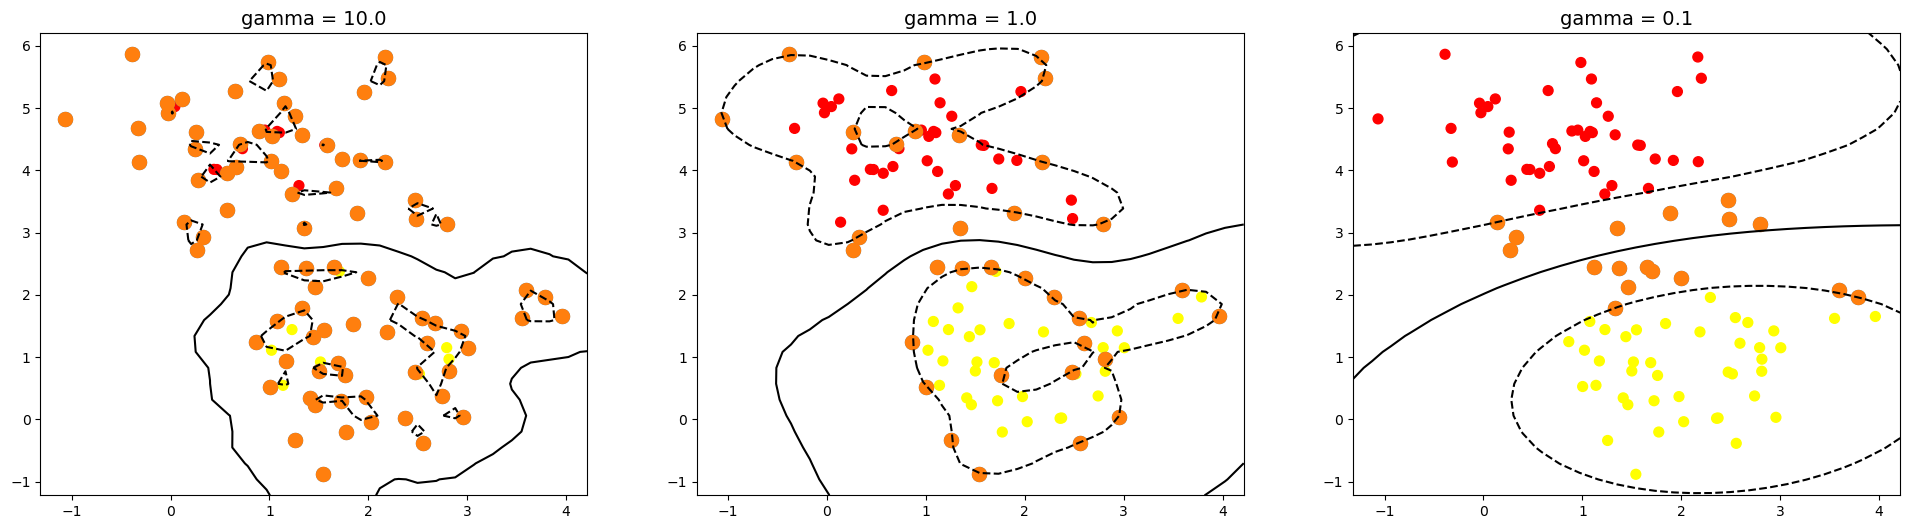

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, g in zip(ax, [10, 1, 0.1]):
    model = SVC(kernel='rbf',gamma=g).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('gamma = {0:.1f}'.format(g), size=14)